In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

C:\Users\ggoncalves\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
data=pd.read_excel('Competição.xlsx')
data

,Integrante,Ação 1,Ação 2,Ação 3,Ação 4
0,Pedro,GUAR3.SA,LREN3.SA,VVAR3.SA,B3SA3.SA
1,João,B3SA3.SA,VVAR3.SA,GUAR3.SA,MGLU3.SA
2,Carlos,B3SA3.SA,MOVI3.SA,RENT3.SA,MGLU3.SA
3,Amanda,VVAR3.SA,MOVI3.SA,MGLU3.SA,GUAR3.SA


In [5]:
rentabilidade=[]
rent=[0]

In [6]:
for j in range(len(data)):
    for i in range(len(data)):
        rent[i]=np.mean(wb.DataReader(data.iloc[j][1+i], data_source='yahoo', start='2020-6-1')['Adj Close'])
    rentabilidade.append(np.mean(rent))

In [7]:
data['Rentabilidade']=rentabilidade

In [8]:
data

,Integrante,Ação 1,Ação 2,Ação 3,Ação 4,Rentabilidade
0,Pedro,GUAR3.SA,LREN3.SA,VVAR3.SA,B3SA3.SA,31.096429
1,João,B3SA3.SA,VVAR3.SA,GUAR3.SA,MGLU3.SA,36.275714
2,Carlos,B3SA3.SA,MOVI3.SA,RENT3.SA,MGLU3.SA,41.974286
3,Amanda,VVAR3.SA,MOVI3.SA,MGLU3.SA,GUAR3.SA,27.186071


# Comparação gráfica:

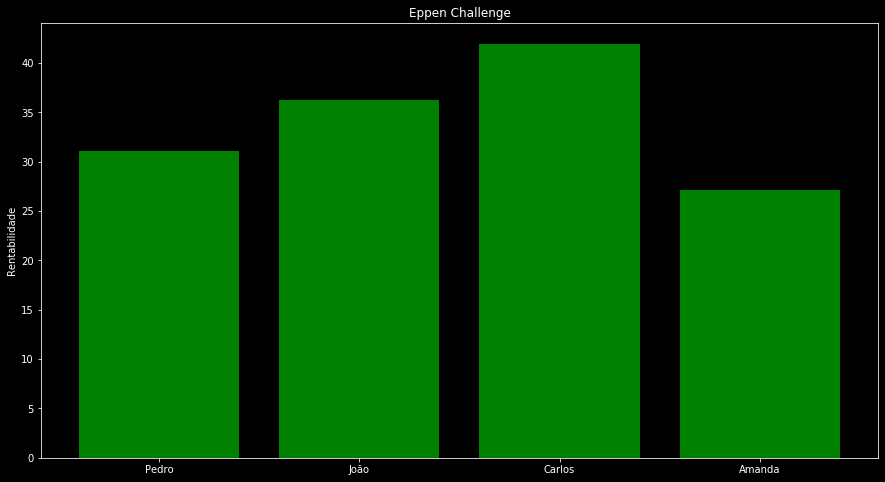

In [14]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.bar(data['Integrante'],data['Rentabilidade'],color='green')
plt.ylabel('Rentabilidade');
plt.title('Eppen Challenge');